### 26 AĞUSTOS - 1 EYLÜL TARİHLERİ ARASI TEKNOFEST İFADESİ GEÇEN TWEETLER VE ANALİZİ  🚀 

In [ ]:
# Kullanılan kütüphanelerin kurulması
!pip install pipwin
!pipwin install gdal
!pipwin install fiona
!pip install geopandas
!pip install keplergl
!pip install ipywidgets
!pip install networkx
!pip install textblob

In [1]:
import pandas as pd
import numpy as np         
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot
from os import path
from PIL import Image

# For Scraping
import snscrape.modules.twitter as sntwitter
import nest_asyncio


#Duygu Analizi
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from top2vec import Top2Vec
import nltk
nltk.download('stopwords')

#lang, latitute
from shapely.geometry import Point
import geopandas as gpd

#Social Analysis
import networkx as nx

import glob                     
import os
import regex as re

import datetime 
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from warnings import filterwarnings
filterwarnings('ignore')

#for compatibility issues with twint
nest_asyncio.apply()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### VERİ KAZIMA VE DATAFRAME NESNESİNE KAYDETME İŞLEMLERİ

In [ ]:
dataframe = []
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('TEKNOFEST since:2022-08-26 until:2022-09-01').get_items()):
    
    dataframe.append([tweet.cashtags,tweet.content,tweet.conversationId,tweet.coordinates,tweet.date,tweet.hashtags,
                     tweet.id,tweet.inReplyToTweetId,tweet.inReplyToUser,tweet.lang,tweet.likeCount,tweet.media,tweet.mentionedUsers,
                     tweet.outlinks,tweet.outlinksss,tweet.place,tweet.quoteCount,tweet.quotedTweet,tweet.renderedContent,
                     tweet.retweetedTweet,tweet.source,tweet.sourceLabel,tweet.sourceUrl,tweet.tcooutlinks,tweet.tcooutlinksss,
                     tweet.url,tweet.user.username,tweet.replyCount,tweet.retweetCount])
df = pd.DataFrame(dataframe, columns=['cashtags','content', 'conversationId','coordinates','date','hashtags','id',
                                'inReplyToTweetId','inReplyToUser','lang','likeCount','media','mentionedUsers',
                                'outlinks','outlinksss','place','quoteCount','quotedTweet','renderedContent','retweetedTweet',
                                'source','sourceLabel','sourceUrl','tcooutlinks','tcooutlinksss','url','username',"replyCount","retweetCount"])
df.to_csv('TEKNOFEST_Twitter.csv',index=False)

In [2]:
df = pd.read_csv('TEKNOFEST_Twitter.csv')
df['DateTime'] = pd.to_datetime(df['date'],format="%Y/%m/%d %H:%M:%S")
df['Date'] = df['DateTime'].dt.date
df['Hour'] = df['DateTime'].dt.hour
df["Days"] = df["DateTime"].dt.day_name()
df['by_hour'] = pd.to_datetime(df['DateTime'].dt.floor('H'))

In [3]:
df.shape

(6918, 34)

In [4]:
def Missing_Values(data):
    variable_name=[]
    total_value=[]
    total_missing_value=[]
    missing_value_rate=[]
    unique_value_list=[]
    total_unique_value=[]
    data_type=[]
    for col in data.columns:
        variable_name.append(col)
        data_type.append(data[col].dtype)
        total_value.append(data[col].shape[0])
        total_missing_value.append(data[col].isnull().sum())
        missing_value_rate.append(round(data[col].isnull().sum()/data[col].shape[0],3))
        unique_value_list.append(data[col].unique())
        total_unique_value.append(len(data[col].unique()))
    missing_data=pd.DataFrame({"Variable":variable_name,"Total_Value":total_value,\
                             "Total_Missing_Value":total_missing_value,"Missing_Value_Rate":missing_value_rate,
                             "Data_Type":data_type,"Unique_Value":unique_value_list,\
                               "Total_Unique_Value":total_unique_value})
    return missing_data.sort_values("Missing_Value_Rate",ascending=False)
Missing_Values(df)

Variable  Total_Value  Total_Missing_Value  Missing_Value_Rate            Data_Type                                       Unique_Value  Total_Unique_Value
0           cashtags         6918                 6918               1.000              float64                                              [nan]                   1
19    retweetedTweet         6918                 6918               1.000              float64                                              [nan]                   1
15             place         6918                 6632               0.959               object  [nan, Place(fullName='Samsun, Türkiye', name='...                  84
3        coordinates         6918                 6632               0.959               object  [nan, Coordinates(longitude=36.1675786, latitu...                  89
17       quotedTweet         6918                 6567               0.949               object  [nan, https://twitter.com/serbestiyetweb/statu...                 257
7   inReplyToTweetId         6918                 5308               0.767              float64  [nan, 1.5650219201307443e+18, 1.56508997155552...                 801
8      inReplyToUser         6918                 5308               0.767               object  [nan, https://twitter.com/uzunabdurrahman, htt...                 530
13          outlinks         6918                 4398               0.636               object  [['https://www.turkcuhaber.net/son-dakika/selc...                2088
23       tcooutlinks         6918                 4398               0.636               object  [['https://t.co/PbLH9ivLVr'], ['https://t.co/w...                2442
14        outlinksss         6918                 4398               0.636               object  [https://www.turkcuhaber.net/son-dakika/selcuk...                2088
24     tcooutlinksss         6918                 4398               0.636               object  [https://t.co/PbLH9ivLVr, https://t.co/w0zRJt7...                2442
5           hashtags         6918                 4108               0.594               object  [nan, ['EKONOMİ', 'Girişim'], ['TeknofestKarad...                1240
12    mentionedUsers         6918                 3886               0.562               object  [nan, [User(username='uzunabdurrahman', id=252...                1363
11             media         6918                 3832               0.554               object  [nan, [Photo(previewUrl='https://pbs.twimg.com...                3049
31              Hour         6918                    0               0.000                int64  [23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 1...                  24
32              Days         6918                    0               0.000               object  [Wednesday, Tuesday, Monday, Sunday, Saturday,...                   6
30              Date         6918                    0               0.000               object  [2022-08-31, 2022-08-30, 2022-08-29, 2022-08-2...                   6
29          DateTime         6918                    0               0.000  datetime64[ns, UTC]  [2022-08-31 23:59:57+00:00, 2022-08-31 23:56:0...                6765
28      retweetCount         6918                    0               0.000                int64  [0, 1, 22, 102, 124, 3, 4, 25, 56, 2, 5, 34, 1...                 183
27        replyCount         6918                    0               0.000                int64  [0, 1, 12, 39, 2, 3, 6, 10, 4, 24, 8, 9, 5, 31...                  72
26          username         6918                    0               0.000               object  [turkcuhabernet, ekonomihcomtr, davutkocak, mz...                3832
25               url         6918                    0               0.000               object  [https://twitter.com/turkcuhabernet/status/156...                6918
2     conversationId         6918                    0               0.000                int64  [1565127284541083649, 1565126314428092417, 156...                5667
22  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   cashtags          0 non-null      float64            
 1   content           6918 non-null   object             
 2   conversationId    6918 non-null   int64              
 3   coordinates       286 non-null    object             
 4   date              6918 non-null   object             
 5   hashtags          2810 non-null   object             
 6   id                6918 non-null   int64              
 7   inReplyToTweetId  1610 non-null   float64            
 8   inReplyToUser     1610 non-null   object             
 9   lang              6918 non-null   object             
 10  likeCount         6918 non-null   int64              
 11  media             3086 non-null   object             
 12  mentionedUsers    3032 non-null   object             
 13  out

In [6]:
# Toplam tweet atan kullanıcı sayısı
df['username'].nunique()

3832

In [7]:
# Kullanıcıların tweet sayısı
df.groupby(["username"]).agg(tweet_sayisi = ("content", lambda x: x.count())).sort_values(by='tweet_sayisi',
                                                                                          ascending=False).reset_index()

username  tweet_sayisi
0           teknofest            67
1     samsunhaber_smg            56
2     mustafademirbsb            40
3           MemAtakum            34
4            samsunhm            33
...               ...           ...
3827      TrAzDergisi             1
3828      Tr__Ekonomi             1
3829    Trabzon61_RTE             1
3830   TrkischeNomade             1
3831     zzehra_gunes             1

[3832 rows x 2 columns]

In [8]:
# Beğeni sayısı / Tweet sayısı &  En çok rağbet gören tweetler olarak da bakabiliriz
pd.DataFrame(df.groupby("username").sum()["likeCount"] / df.groupby('username')['content'].count(),columns=['oran']).sort_values("oran",ascending=False).reset_index()

username          oran
0         nevsinmengu  28340.000000
1              Selcuk  12526.333333
2     KyivIndependent   7073.000000
3          haskologlu   5660.000000
4        themarginale   4554.000000
...               ...           ...
3827      haberinioku      0.000000
3828  haberindogrusu_      0.000000
3829   haberin_ozetii      0.000000
3830      haberhascom      0.000000
3831         00spacex      0.000000

[3832 rows x 2 columns]

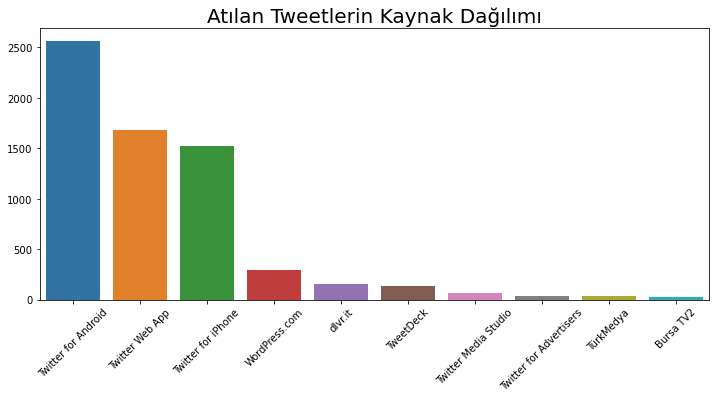

In [9]:
count_label = df['sourceLabel'].value_counts()[:10]
plt.figure(figsize=(12,5))
sns.barplot(count_label.index, count_label.values)
plt.xticks(rotation = 45)
plt.title('Atılan Tweetlerin Kaynak Dağılımı',fontsize=20)
plt.show()

# Tweet Saat Dağılımı

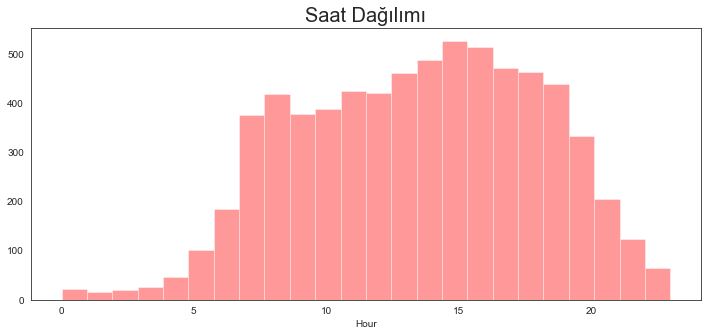

In [10]:
plt.figure(figsize=(12,5))
sns.set_style('white')
sns.distplot(df['Hour'], kde = False, color ='red',bins = 24)
plt.title('Saat Dağılımı',fontsize=20)
plt.show()

# Tweet Gün Dağılımı

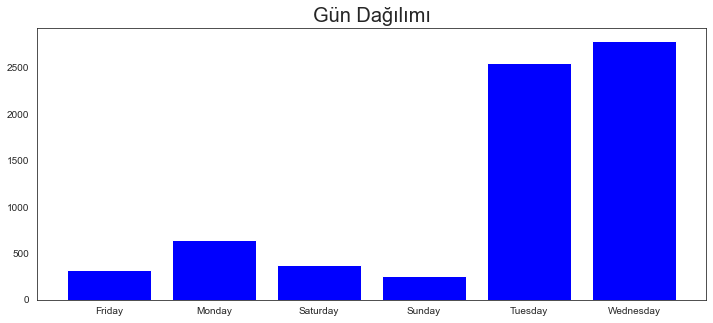

In [11]:
frenq_days = df.groupby('Days')['id'].count().to_frame()
plt.figure(figsize=(12,5))
plt.bar(frenq_days.index,frenq_days['id'],color ='blue')
plt.title('Gün Dağılımı',fontsize=20)
plt.show()

# Gün Bazında En Çok Tweet Atılan Saatler

In [12]:
Tweet_Days_Hour = df.groupby(['Days','by_hour'])['content'].count().reset_index()
Tweet_Days_Hour.sort_values(by="content",ascending=False).drop_duplicates(["Days"],ignore_index=True)

Days                   by_hour  content
0  Wednesday 2022-08-31 15:00:00+00:00      267
1    Tuesday 2022-08-30 13:00:00+00:00      230
2     Monday 2022-08-29 14:00:00+00:00       56
3   Saturday 2022-08-27 10:00:00+00:00       41
4     Friday 2022-08-26 17:00:00+00:00       30
5     Sunday 2022-08-28 10:00:00+00:00       26

# Kullanıcıların Mention Attığı Hesaplar

In [13]:
def hastag_find(X):
    X = X.split()
    X_new = [t for t in X if t.startswith('@')]
    return ' '.join(X_new)
df['mentionedUsers@'] = df['content'].apply(hastag_find)
df['mentionedUsers@'] = df['mentionedUsers@'].replace("",np.NaN)
df_mention = df['mentionedUsers@'].value_counts().rename_axis('Mention').reset_index(name='Mention_Sayisi')
df_mention

Mention  Mention_Sayisi
0                                            @teknofest             402
1                                               @Selcuk             152
2                                    @teknofest @Selcuk              81
3                                           @enginozkoc              64
4                                        @kilicdarogluk              53
...                                                 ...             ...
1385                              @turalugur @teknofest               1
1386  @sevilayyaziyor @HaberturkTV @EbruBaki @asayda...               1
1387                          @nilocan34 @hakislamdavam               1
1388                      @teknofest @TCSanayi @T3Vakfi               1
1389                                @teknofest @Tubitak               1

[1390 rows x 2 columns]

## Kordinat bilgisi olan tweetlerin görselleştirilmesi

In [14]:
df['longitude'] = df[~df['coordinates'].isnull()]['coordinates'].str.split(' ',expand=True)[0].str.split('=',expand=True)[1].str.replace(',','')
df['latitude'] = df[~df['coordinates'].isnull()]['coordinates'].str.split(' ',expand=True)[1].str.split('=',expand=True)[1].str.replace(')','')

In [15]:
vizual = df[~df['longitude'].isnull()][['likeCount','username','replyCount','retweetCount','longitude','latitude']].copy()
vizual.sort_values('likeCount',ascending=False)

likeCount         username  replyCount  retweetCount           longitude            latitude
3229        386     NesrinOzoren          14            22          28.6321043          40.8027337
3230        380        AdemMetan          17             6   36.33253702576761   41.30148033248404
3599        217        CK_Samsun          52            25          34.8478898          40.8305704
6335        174        CK_Samsun           4            21          36.1675786          41.2057865
1390        169        CK_Samsun          14            20          36.1313328          41.1332946
6364        166        CK_Samsun           5            21          36.1675786          41.2057865
1051        127      ekremacikel         406            41  28.818119210952528   41.00468333283507
691         114          Tubitak           1            23          36.7017882          41.1768589
2020        107        CK_Samsun           7            10          35.4077376          41.3012829
649          89    sinannakdogan           0             0           29.080789          40.4056029
1881         79  mustafademirbsb           2             9          36.1675786          41.2057865
4817         66  mustafademirbsb           1             4          36.5031646          41.0583319
5393         65       alevderya_           8             5          40.4208712          40.8588387
5276         64  mustafademirbsb           0             8          36.5031646          41.0583319
1311         58          Niss_61           3             4          28.6321043          40.8027337
5650         55          Tubitak           0            13  36.555139599697405    41.2573772124636
5576         51    MersinMEMArGe           0            11          36.1675786          41.2057865
4665         50      vennasakyol           2             0          36.1675786          41.2057865
4000         50     FuatKoktas55           2             7          36.1675786          41.2057865
6538         48  mustafademirbsb           0             4          36.1675786          41.2057865
6243         48       kokcamomer           1             5          36.1313328          41.1332946
227          45       WORLD_2023           0            39           25.668509          35.8084193
6197         43  mustafademirbsb           0             2          36.1675786          41.2057865
3240         43    ibrahimuslu55           0             4          34.3440864           40.147768
2277         42  mustafademirbsb           1             5          36.1675786          41.2057865
3973         42          Niss_61           0             2          28.6321043          40.8027337
1212         39         aisnrypr           1             0          36.1675786          41.2057865
5934         39  mustafademirbsb           1             4          36.1675786          41.2057865
2036         38  mustafademirbsb           0             2          36.1675786          41.2057865
6342         38  mustafademirbsb           0             5          36.1675786          41.2057865
2113         37    MersinMEMArGe           1             9          35.5124202           41.220927
1275         36  mustafademirbsb           3             1          36.1675786          41.2057865
3784         33  OzgulOzkanYAVUZ           0             3          36.5031646          41.0583319
4107         33  mehmetyasinozlu           0             2          36.5031646          41.0583319
6811         32      vennasakyol           1             0          36.1675786          41.2057865
3850         32   arslantasemrah           1             0           37.247588           41.110564
1616         32  mustafademirbsb           0             4          36.1675786          41.2057865
1197         32  mustafademirbsb           0             1          36.1675786          41.2057865
590          31  mustafademirbsb           1             3          36.1675786          41.2057865
4945         31    mehmet_dilbaz           1  

In [16]:
from keplergl import KeplerGl
map1 = KeplerGl(heigth=800)
map1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl()

In [17]:
# Create a gepdataframe
gdf = gpd.GeoDataFrame(vizual, geometry=gpd.points_from_xy(vizual.longitude, vizual.latitude))
# Add data to Kepler
map1.add_data(data=gdf, name="Distribution")
#map1.save_to_html(data={'vizual': vizual},file_name='first_map.html')

In [ ]:
#map1.save_to_html(file_name='first_mapLikeCount.html', read_only=True)

# Tweetlerin Temizlenmesi

In [18]:
#Emojileri kaldırır
df['content'] = df['content'].str.replace(r'[^\x00-\x7F]+', '', regex=True)

In [19]:
def clean_txt(dataframe,columns):
    dataframe[columns] = dataframe[columns].replace(r'\'|\"|\,|\.|\?|\+|\-|\/|\=|\(|\)|\n|"', '', regex=True)
    dataframe[columns] = dataframe[columns].replace("  ", " ")
    mystopwords = set(stopwords.words('turkish'))
    dataframe[columns] = dataframe[columns].apply(lambda x: ' '.join([word for word in str(x).split() if word not in mystopwords]))
    return dataframe
#Linklerin ve mentionların kaldırılması
def clean_two(X):
    X = X.split()
    X_new = [x for x in X if not x.startswith(('https:','#','@'))]
    return ' '.join(X_new)
df['content'] = df['content'].apply(clean_two)
df = clean_txt(df,"content")

#  Top2Vec Modülü ile Tweetlerin Analizi
- Yapay zeka destekli olan modül, tweetler arasında ki ilişkiyi bularak vectorize eder.
- Detaylı bilgi için [link](https://github.com/ddangelov/Top2Vec)

In [20]:
model = Top2Vec(df['content'].values,workers=4,speed='learn')

2022-09-03 19:54:13,071 - top2vec - INFO - Pre-processing documents for training
2022-09-03 19:54:13,315 - top2vec - INFO - Creating joint document/word embedding
2022-09-03 19:54:30,457 - top2vec - INFO - Creating lower dimension embedding of documents
2022-09-03 19:55:03,149 - top2vec - INFO - Finding dense areas of documents
2022-09-03 19:55:03,482 - top2vec - INFO - Finding topics


In [21]:
#Toplam konu sayısı
model.get_num_topics()

5

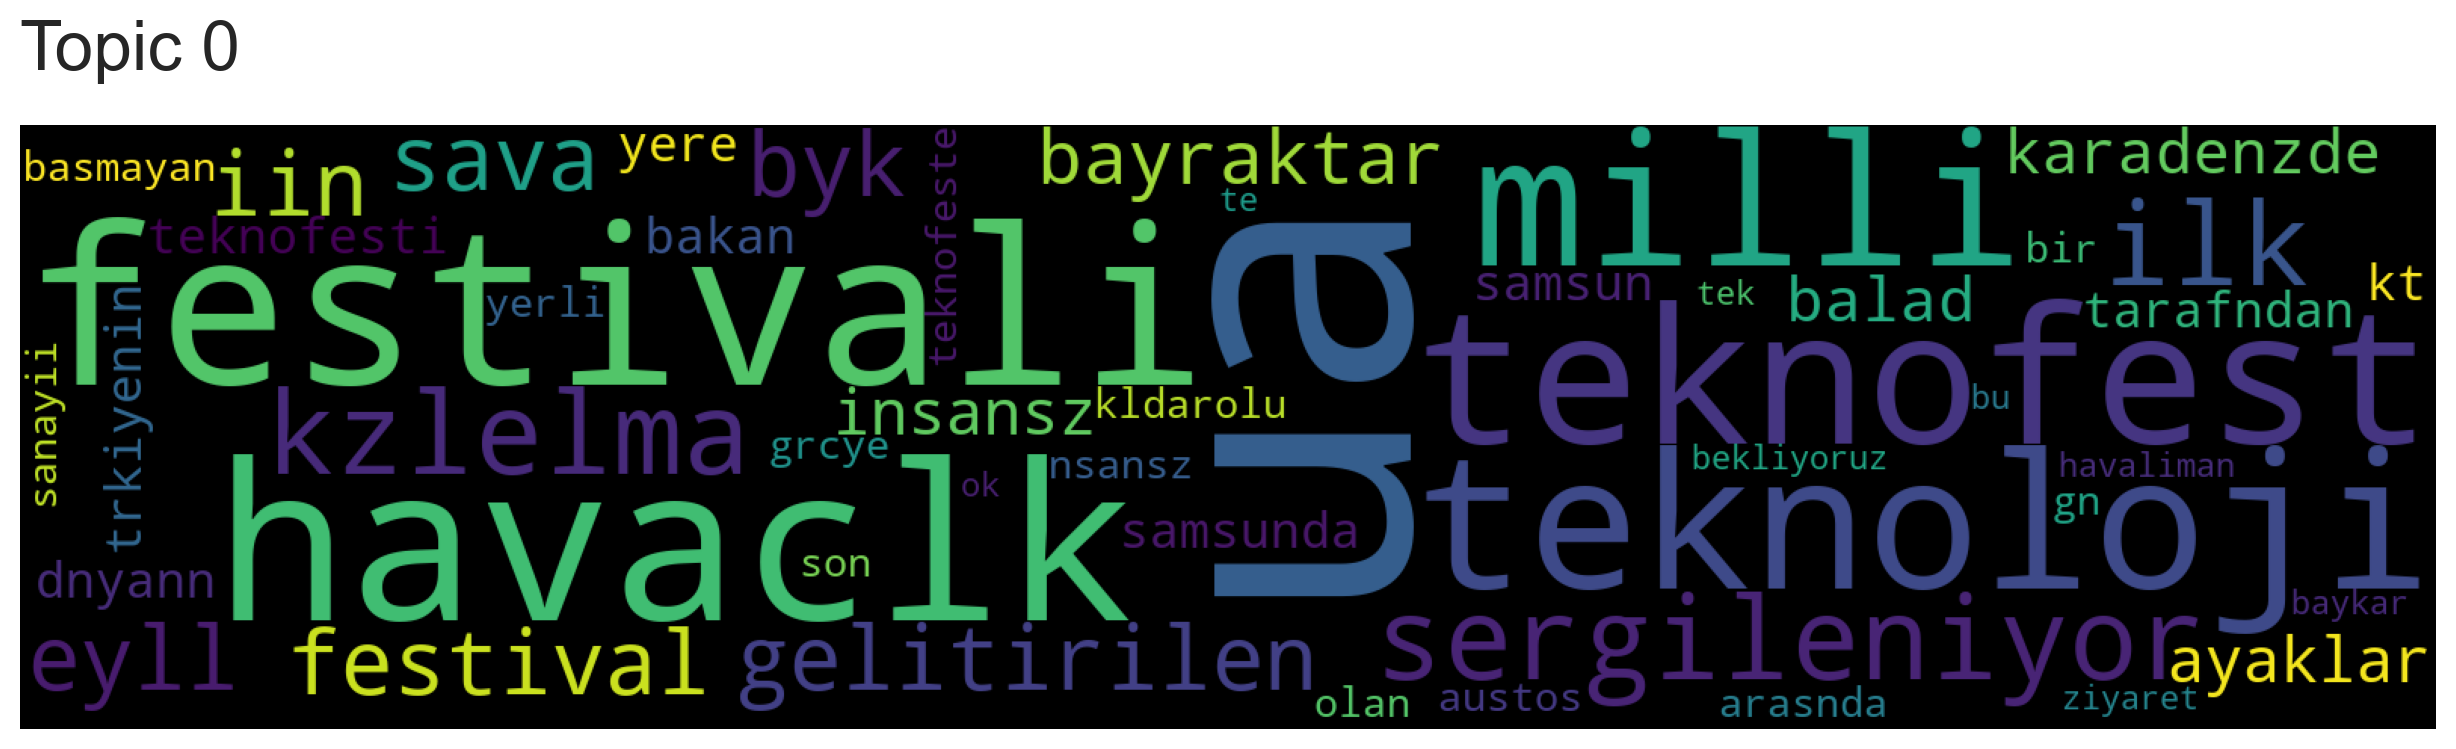

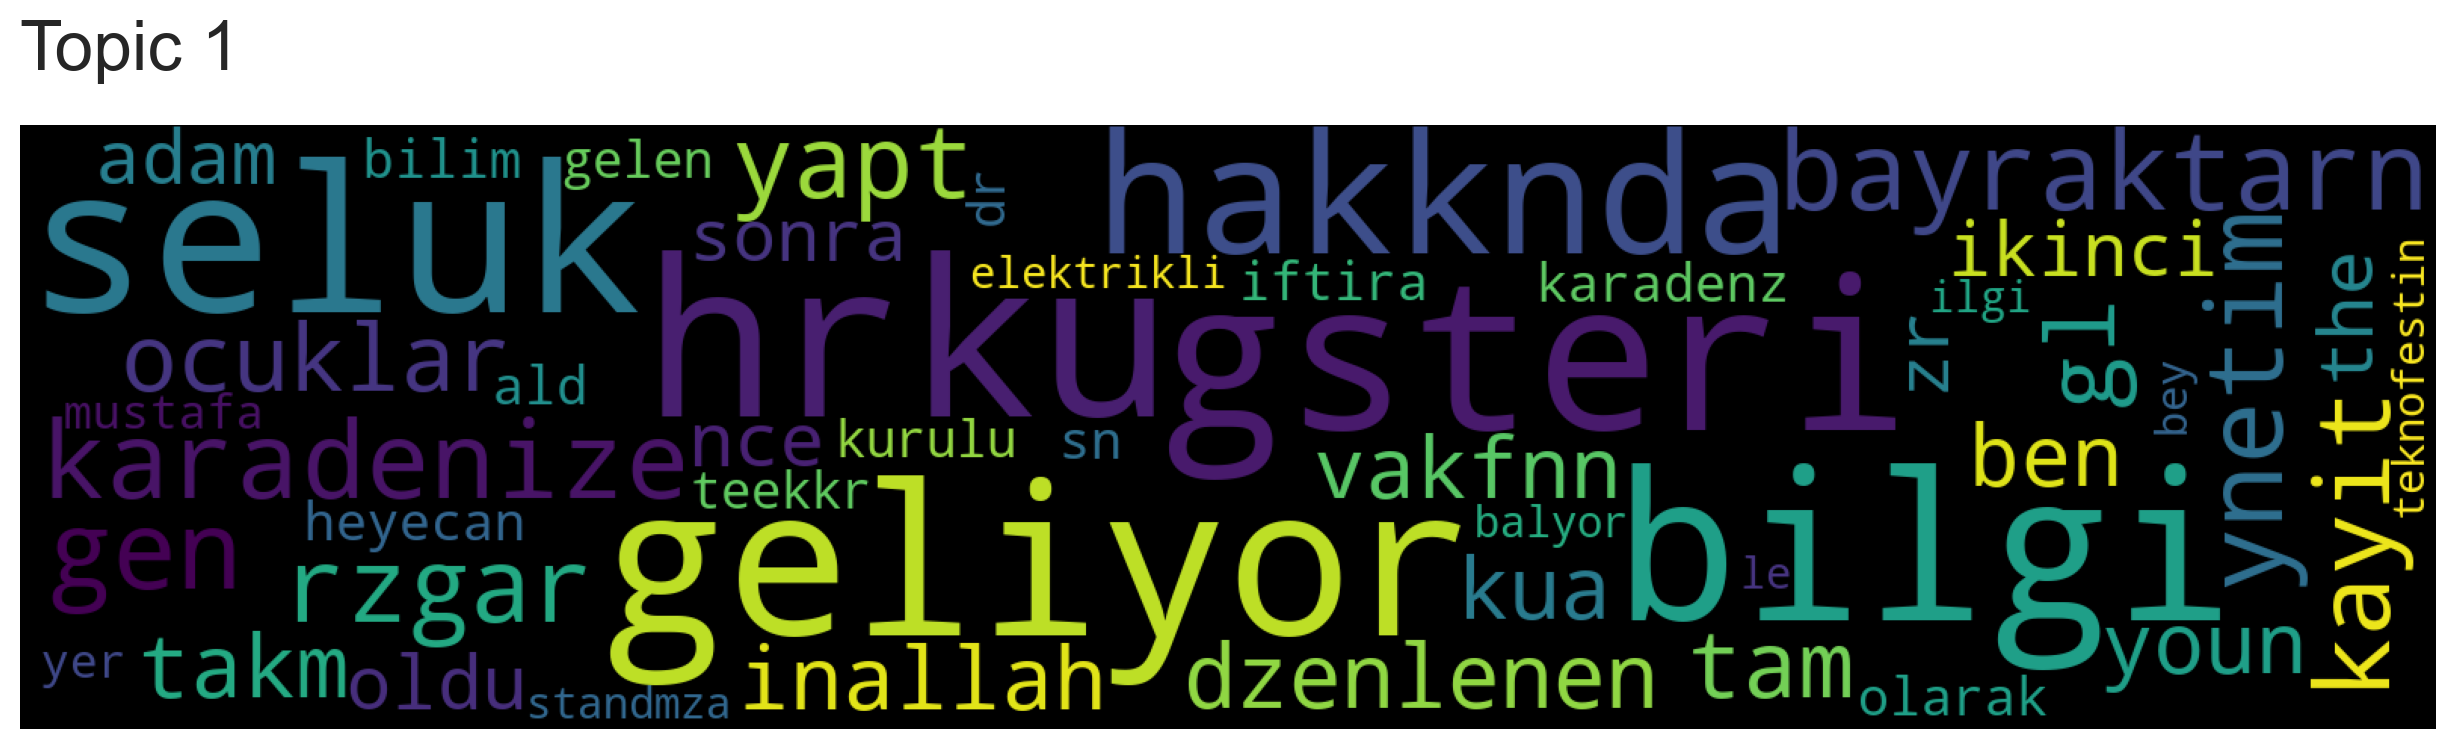

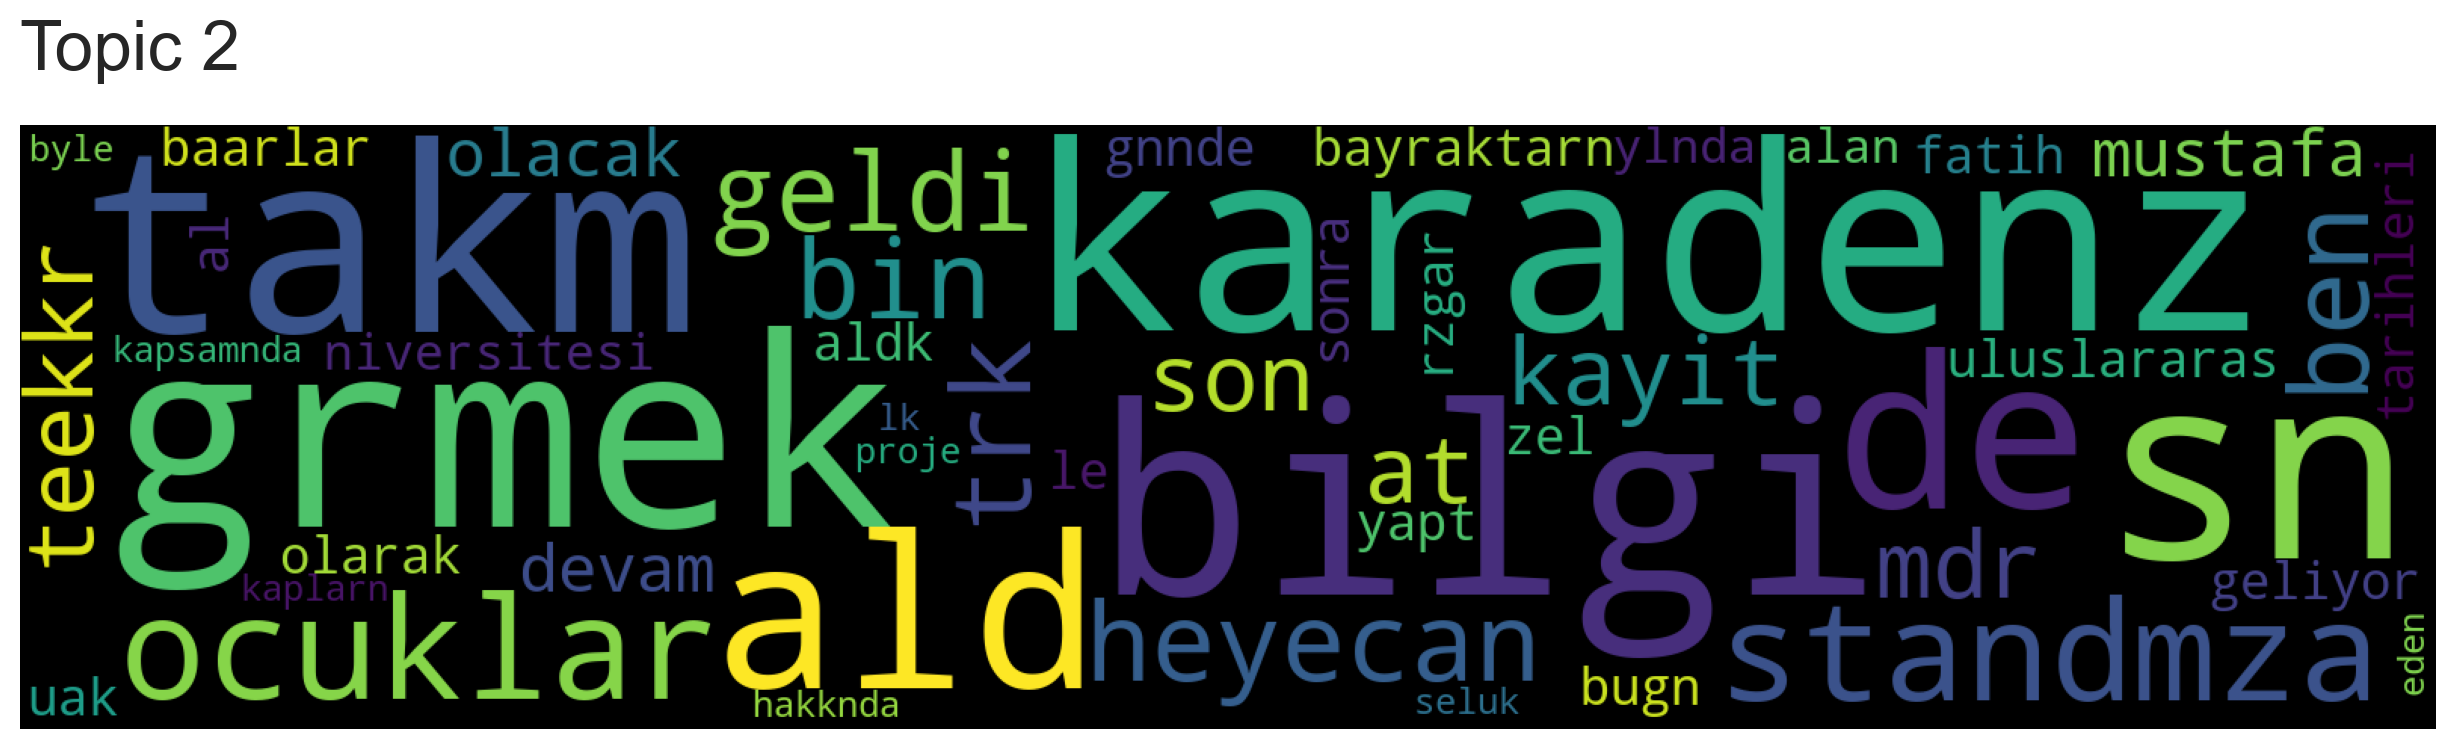

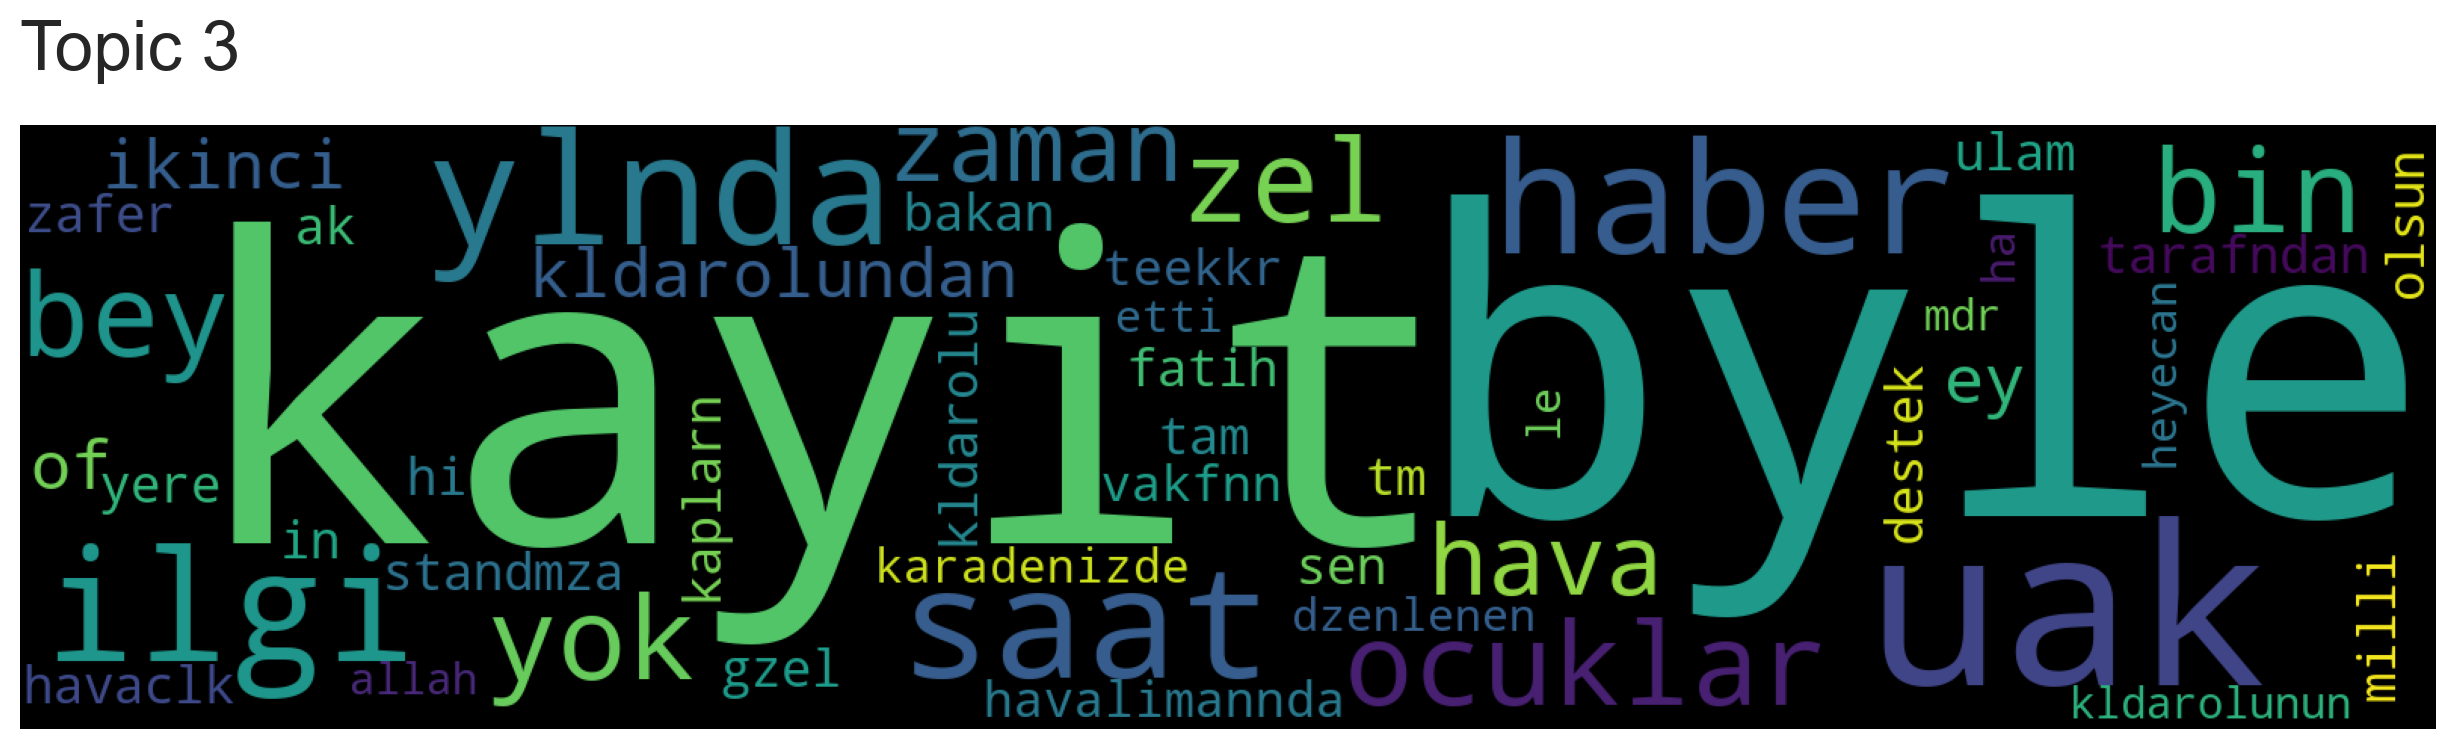

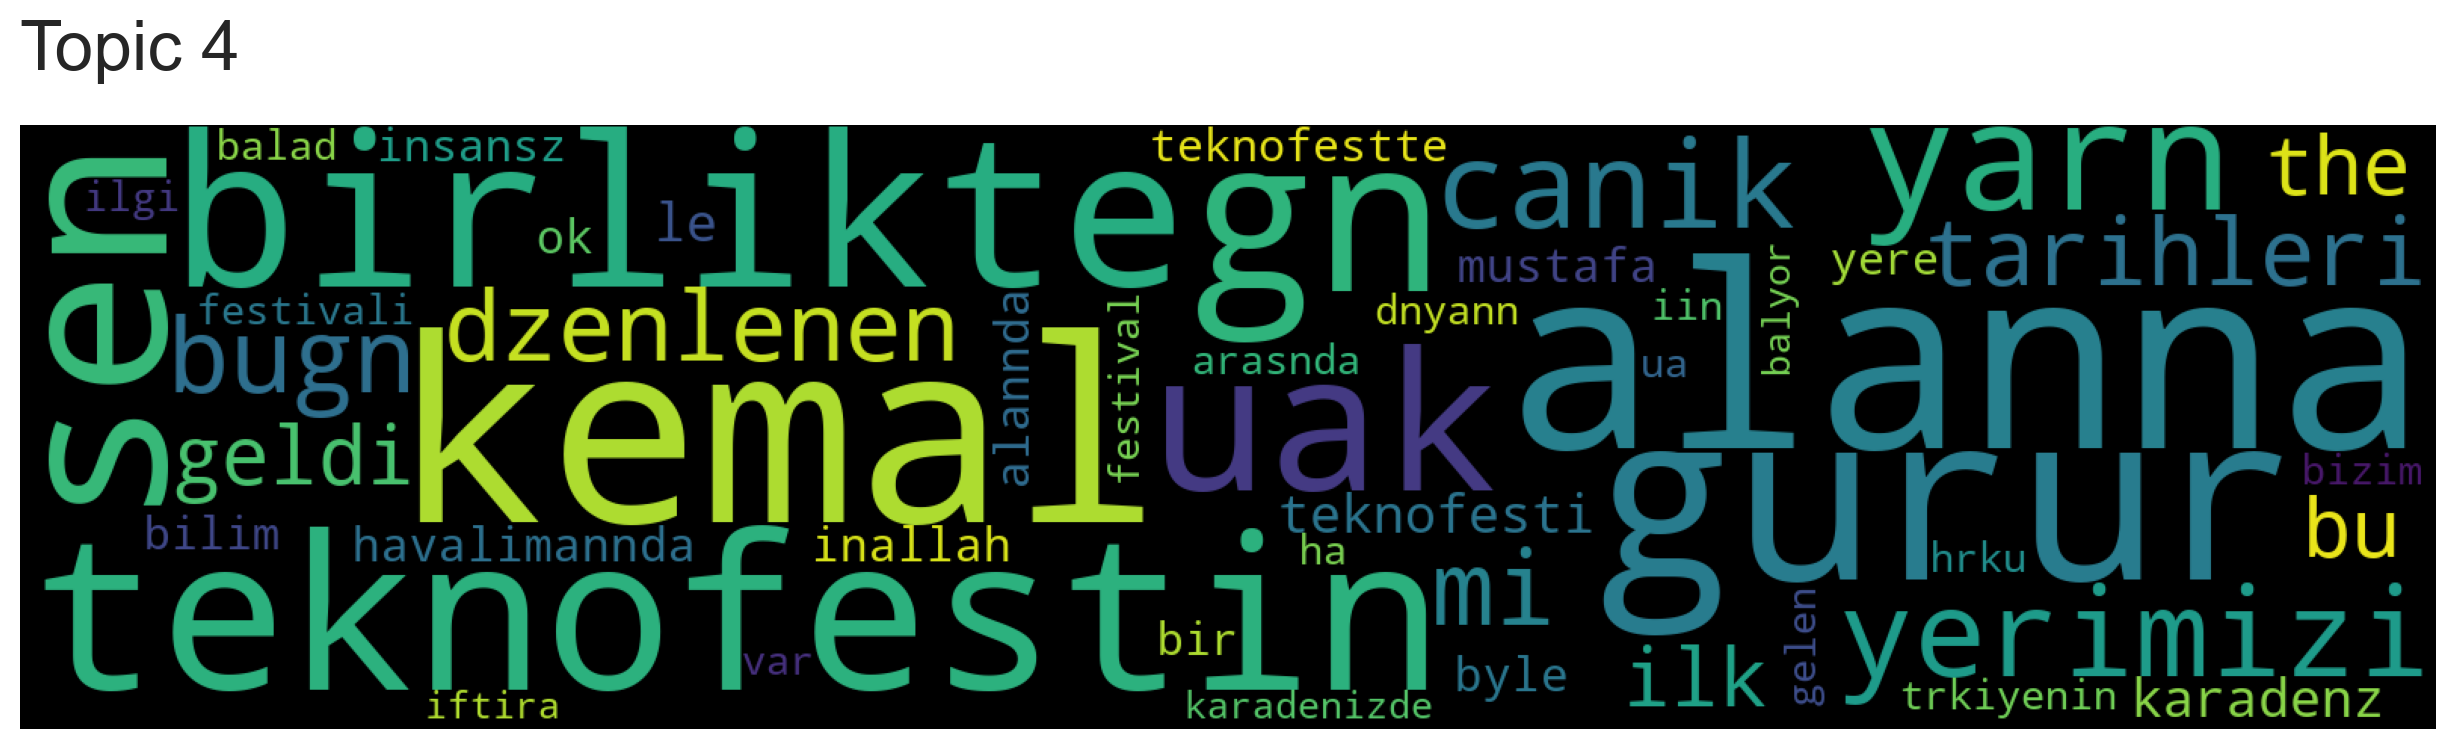

In [22]:
for i in range(0,model.get_num_topics()):
    model.generate_topic_wordcloud(i)

In [23]:
topic_sizes, topic_nums = model.get_topic_sizes()
topic_words, word_scores, topic_nums = model.get_topics(2)
for words,scores, num in zip(topic_words, word_scores, topic_nums):
    print(num)
    print(f"Words:{words}")

0
Words:['ua' 'festivali' 'havaclk' 'teknofest' 'teknoloji' 'milli' 'sergileniyor'
 'ilk' 'kzlelma' 'gelitirilen' 'iin' 'festival' 'byk' 'sava' 'eyll'
 'bayraktar' 'ayaklar' 'insansz' 'karadenzde' 'balad' 'teknofesti'
 'samsunda' 'dnyann' 'kt' 'trkiyenin' 'bakan' 'samsun' 'tarafndan' 'yere'
 'basmayan' 'nsansz' 'kldarolu' 'gn' 'arasnda' 'austos' 'olan' 'son'
 'sanayii' 'teknofeste' 'yerli' 'grcye' 'bir' 'bekliyoruz' 'bu' 'tek'
 'baykar' 'ziyaret' 'te' 'ok' 'havaliman']
1
Words:['hrku' 'geliyor' 'gsteri' 'bilgi' 'seluk' 'hakknda' 'bayraktarn' 'gen'
 'karadenize' 'ynetim' 'rzgar' 'kayit' 'yapt' 'gl' 'ocuklar' 'tam'
 'dzenlenen' 'takm' 'inallah' 'kua' 'vakfnn' 'ben' 'youn' 'ikinci' 'the'
 'nce' 'oldu' 'adam' 'zr' 'sonra' 'heyecan' 'sn' 'ald' 'karadenz' 'iftira'
 'olarak' 'bilim' 'kurulu' 'dr' 'gelen' 'teekkr' 'mustafa' 'yer'
 'elektrikli' 'teknofestin' 'bey' 'balyor' 'le' 'standmza' 'ilgi']


In [24]:
# Her bir tweet için benzerlik skorları
# 0. olarak belirnen konudan 10 örnek
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=0, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 2738, Score: 0.850599467754364
-----------
nsansz Sava Ua Bayraktar Kzlelma ilk Samsundaki TEKNOFESTte CNN TRK ekrannda grcye kt BAYKAR Savunma Genel Mdr Haluk Bayraktar CNN TRK zel Haberler efi Fulya ztrkn sorularn yantlad
-----------

Document: 129, Score: 0.8427611589431763
-----------
Teknofesti gezen Kldarolundan HASHA sorusuna yant CHP Genel Bakan Kemal Kldarolu Trkiye teknoloji alannda zellikle savunma sanayi alannda gzel yatrmlar yapyor Hepimizin yatrmlara destek vermesi lazm kadar basit bir ey dedi
-----------

Document: 4144, Score: 0.8370200395584106
-----------
Bayraktar Kzlelma ilk TEKNOFEST Karadenizde grcye kt BAYKAR Genel Mdr Haluk Bayraktar KIZILELMAnn zelliklerini tek tek anlatarak ilk uuu iin tarih verdi: Kzlelmada hedefimiz 2023n ge ilk eyreinde ua uurmak
-----------

Document: 5596, Score: 0.8366451263427734
-----------
Trkiyenin insansz sava ua Bayraktar Kzlelma Samsunda dzenlenecek TEKNOFEST KARADENZ birlikte ilk grcye kacak
-----------

Document: 6898,

In [25]:
# 1. olarak belirnen konudan 10 örnek
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=1, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 982, Score: 0.685979962348938
-----------
Kaymakammz Sayn Kemal Yldz le Milli Eitim Mdrmz Sayn Mehmet rfan Yetik ube Mdrlerimiz Dursun Yrkc Nee zaydan 20222023 Eitimretim Yl sene ba hazrlk almalar Teknofest ilgili bilgiler aldlar
-----------

Document: 6627, Score: 0.6541500091552734
-----------
Kltr Sosyal ler Dairesi Bakanlmz tarafndan oluturulan Bykehir letiim Noktasndan TEKNOFEST hakknda bilgi alabilirsiniz Panoroma Dijital Gsteri Merkezi n
-----------

Document: 1738, Score: 0.6416717171669006
-----------
Teknofest Ynetim Kurulu Bakan Seluk Bayraktar aabeyimizin Hrku gsteri uuu sonras basn aklamas
-----------

Document: 1616, Score: 0.6293740272521973
-----------
Alo 153 Kent Ynetim Merkezindeki son almalar inceleyerek youn trafik noktalar iin rettiimiz zmler hakknda bilgi aldk Teknofest srecinde youn almalarmzla; trafie zm retmeye devam ediyoruz
-----------

Document: 2244, Score: 0.6046691536903381
-----------
BMS aselsan tarafndan retilmi lityum ak grubu kullanan diye

# Duygu Analizi

In [26]:
def sentiment_analysis(df):
    text = df["content"]

    for i in range(0,len(text)):
        textB = TextBlob(text[i])
        sentiment_skoru = textB.sentiment.polarity
        df.at[i,"sentiment_skoru"] = sentiment_skoru
        
        if sentiment_skoru <0.00:
            duygu_sinifi = 'Negatif'
            df.at[i,"duygu_sinifi"] = duygu_sinifi

        elif sentiment_skoru >0.00:
            duygu_sinifi = 'Pozitif'
            df.at[i,"duygu_sinifi"] = duygu_sinifi

        else:
            duygu_sinifi = 'Notr'
            df.at[i,"duygu_sinifi"] = duygu_sinifi
    return df
df = sentiment_analysis(df)

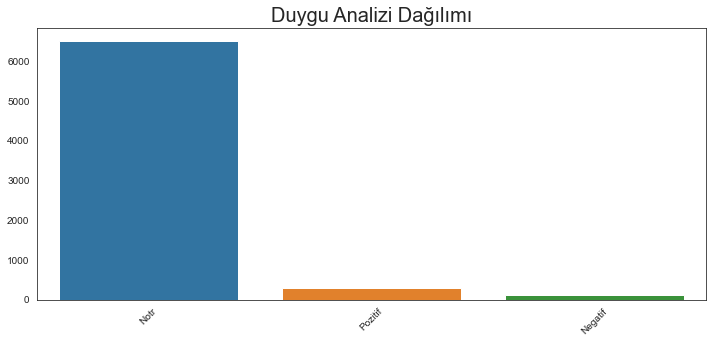

In [27]:
sentiment_label = df['duygu_sinifi'].value_counts()
plt.figure(figsize=(12,5))
sns.barplot(sentiment_label.index, sentiment_label.values)
plt.xticks(rotation = 45)
plt.title('Duygu Analizi Dağılımı',fontsize=20)
plt.show()

In [28]:
date_of_like = df.groupby('Date').agg({'likeCount': 'sum'}). \
sort_values('likeCount', ascending = False)
date_of_tweet = df.groupby('Date').agg({'content': 'count'}). \
sort_values('content', ascending = False)
bar = go.Bar(x = date_of_tweet.index,
             y = date_of_tweet['content'],
             text = ['' + str(i) for i in date_of_tweet['content']],
             textposition= 'outside',
             textfont_color = 'black',
             name = 'Tweet Sayısı',
             marker = dict(color = '#3419CA',
                           opacity = 1))

bar2 = go.Bar(x = date_of_like.index,
              y = date_of_like['likeCount'],
              text = ['' + str(i) for i in date_of_like['likeCount']],
              textposition = 'outside',
              textfont_color = 'black',
              name = 'Beğeni Sayısı',
              marker = dict(color = '#5BCA19',
                            opacity = 0.75))


bar3 = go.Bar()
layout = go.Layout(title={'text': 'Tweet & Like',
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   paper_bgcolor ='#E8E8E8',
                   plot_bgcolor ='#E8E8E8',
                   barmode = 'group',
                   legend=dict(x = 0.05,
                               y = 1,
                               bgcolor = 'rgba(255, 255, 255, 0)',
                               bordercolor = 'rgba(255, 255, 255, 0)'),
                   xaxis = dict(title = ''),
                   yaxis =dict(title = 'Beğeni Sayısı'),
                   font=dict(family = 'Verdana',
                             size = 15,
                             color = 'dimgray'),
                   template = 'plotly')

fig=go.Figure(data = [bar, bar2],
              layout = layout)

iplot(fig)

# Teşekkürler 🥳